Importing the Libraries

In [2]:
import cv2 as cv
import numpy as np
import time, os
import keras
from mediapipe.python.solutions import hands, drawing_utils, drawing_styles
import matplotlib.pyplot as plt

Downloading and verifying the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


[]

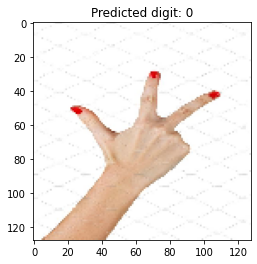

In [3]:
model = keras.models.load_model('fingering.keras')

def predict(img_array):
    x = np.expand_dims(img_array, axis = 0)
    x = x/255.0
    pred = model.predict(x)
    return np.argmax(pred)

img = keras.preprocessing.image.load_img('sample.jpg', target_size=(128, 128))
img_array = keras.preprocessing.image.array_to_img(img)
plt.imshow(img_array)
plt.title(f"Predicted digit: {predict(img_array)}")
plt.plot()

Setting live detection

In [4]:
mpHands = hands.Hands(static_image_mode=False, max_num_hands=6)
pTime = 0
cTime = 0

cap = cv.VideoCapture(0)
while True:
    isTrue, frame = cap.read()
    frame = cv.flip(frame, 1)
    imgRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    results = mpHands.process(imgRGB)
    # print(results.multi_hand_landmarks)
    if results.multi_hand_landmarks:
        for hls in results.multi_hand_landmarks:
            pad = 20
            x1 = np.min([int(landmark.x*frame.shape[1]) for landmark in hls.landmark])-pad
            y1 = np.min([int(landmark.y*frame.shape[0]) for landmark in hls.landmark])-pad
            x2 = np.max([int(landmark.x*frame.shape[1]) for landmark in hls.landmark])+pad
            y2 = np.max([int(landmark.y*frame.shape[0]) for landmark in hls.landmark])+pad
            rgbframe = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
            try:
                frame_roi = cv.resize(rgbframe[y1-40:y2+40, x1-40:x2+40], (128, 128))
                cv.putText(frame, f"Prediction: {predict(frame_roi)}", (x1-20, y1-20), cv.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
            except Exception:
                pass
            cv.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            drawing_utils.draw_landmarks(frame, hls, hands.HAND_CONNECTIONS, drawing_styles.get_default_hand_landmarks_style(), drawing_styles.get_default_hand_connections_style())

    
    cTime = time.time()
    fps = 1/(cTime - pTime)
    pTime = cTime
    cv.putText(frame, f"FPS: {fps:.2f}", (frame.shape[1]-200, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv.imshow("LIVE", frame)
    if cv.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━